# EESTech Challenge - Aveiro 2022
# KAGGLE CIFAR-10

by André Clérigo, João Pedro Amaral and Pedro Lebre da Rocha | Computer Engineering - University of Aveiro 

## Introduction
Using a subset of CIFAR-10 provided by EESTech, perform image classification with the best accuracy possible 

## Datasets Structure
The Dataset provided has the following file structure:
<pre>
dataset/
└── dataset/
    ├── 0/
    │   ├── *.png
    ├── 1/
    │   ├── *.png
    ├── 2/
    │   ├── *.png
    ├── 3/
    │   ├── *.png
    ├── 5/
    │   ├── *.png
    ├── 7/
    │   ├── *.png
    ├── 8/
    │   ├── *.png
    ├── 9/
    │   ├── *.png
</pre>
The Testset provided has the following file structure:
<pre>
testset/
└── testset/
    ├── *.png
</pre>

## Imports

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

## Loading the training data and spiliting it into training/validation datasets

In [2]:
# Getting dataset's path
ds_path = pathlib.Path('/kaggle/input/eestecchallenge/dataset/dataset/')

# Define parameters
batch_size = 32
img_height = 32
img_width = 32

# Configure the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    ds_path,
    validation_split=0.20,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Configure the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    ds_path,
    validation_split=0.20,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 40000 files belonging to 8 classes.
Using 32000 files for training.


2022-03-19 22:22:54.802107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 22:22:54.887628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 22:22:54.888334: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 22:22:54.892387: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 40000 files belonging to 8 classes.
Using 8000 files for validation.


## Model Architecture

In [3]:
# Get the existing classes
class_names = train_ds.class_names
num_classes = len(class_names)

# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create the Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Model compiling and training 

In [4]:
# Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '
2022-03-19 22:23:04.385101: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-19 22:23:14.660267: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 214 of 1000
2022-03-19 22:23:24.667597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 430 of 1000
2022-03-19 22:23:34.666891: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 624 of 1000
2022-03-19 22:23:44.652558: I tensorflow/core/kernels/d

1000/1000 [==============================] - 74s 18ms/step - loss: 1.6574 - accuracy: 0.4245 - val_loss: 1.2126 - val_accuracy: 0.5518
Epoch 2/50
1000/1000 [==============================] - 6s 6ms/step - loss: 1.0786 - accuracy: 0.6043 - val_loss: 1.0222 - val_accuracy: 0.6263
Epoch 3/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.8952 - accuracy: 0.6753 - val_loss: 0.7073 - val_accuracy: 0.7409
Epoch 4/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.7795 - accuracy: 0.7193 - val_loss: 0.7238 - val_accuracy: 0.7376
Epoch 5/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.7064 - accuracy: 0.7449 - val_loss: 0.5960 - val_accuracy: 0.7853
Epoch 6/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.6464 - accuracy: 0.7707 - val_loss: 0.5788 - val_accuracy: 0.7911
Epoch 7/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5973 - accuracy: 0.7880 - val_loss: 0.5233 - val_accuracy: 0.8080
E

## Data Visualization

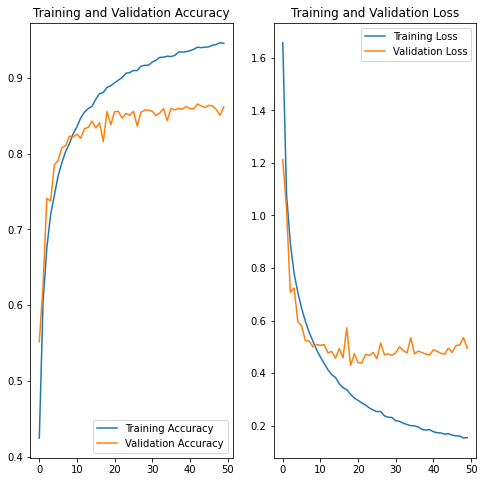

In [5]:
# Visualize the training data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict the testset images

In [6]:
test_names = []
predictions = []
testset_path = '/kaggle/input/eestecchallenge/testset/testset/'

test_files = open('/kaggle/input/eestecchallenge/test_files.txt', 'r')
for x in test_files:
    test_names.append(x)
test_files.close()

test_loop = np.linspace(0, len(test_names), int(len(test_names)/500)+1, dtype=int)

# Iterate through all the images in the testset
for i in range(1,len(test_loop)):
    batch = np.zeros((500,32,32,3))
    for kk,j in enumerate(range(test_loop[i-1], test_loop[i])):
        img_path = testset_path + test_names[j].strip()
        img = tf.keras.utils.load_img(img_path,color_mode='rgb')
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch
        batch[kk,:,:,:] = img_array
    preds = model.predict(batch)

    predictions = predictions + list(np.argmax(preds, axis=1))

# Save the predictions in the correct format
with open('/kaggle/working/submission.csv', 'w') as f:  
    f.write('id,category\n')
    for i,row in enumerate(predictions):
        f.write(test_names[i].strip()+','+str(row)+'\n')